In [1]:
from deep_autoviml import deep_autoviml as deepauto
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf


Imported deep_auto_viml. version=0.0.49
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [2]:
BATCHSIZE = 256
CLASSES = 10
EPOCHS = 25
NUM_TRIALS = 5

In [3]:
target = 'image' ### It doesn't matter what name you give for image target
datapath = '../Ram/Data_Sets/'

In [4]:
image_dir = datapath+'beans/'
img_height = 224
img_width = 224
img_channels = 3

In [5]:
keras_model_type =  "image" ## always try "auto" first, then "basic", "deep", "big deep", "giant deep", "cnn1" etc.
keras_options = {"early_stopping": True, 'lr_scheduler': 'rlr', "epochs": 3}  ### always set early_stopping to True first and then change it to False
model_options = {'tuner':"optuna", "max_trials":2, 'cat_feat_cross_flag':True, 
                 'image_directory': image_dir, 'image_height': img_height, 
                 'image_width':img_width, 'image_channels':img_channels }
## always set the tuner to "storm" first and then "optuna"
#### You always need 15 max_trials to get something decent #####

    Only CPU found on this device
Setting CPU strategy using 1 devices
For image use case:
    Image directory given as ../Ram/Data_Sets/beans/
    Image height given as 224
    Image width given as 224
    Image channels given as 3
No validation folder found under given image directory ../Ram/Data_Sets/beans/. Returning...
Found 1034 files belonging to 3 classes.

Splitting train into two: train and validation data
Number of image classes = 3 and they are: ['angular_leaf_spot', 'bean_rust', 'healthy']
Training image model. This will take time...
Epoch 1/3
8/8 [==============================] - 34s 3s/step - loss: 1.2284 - accuracy: 0.3867 - val_loss: 0.8343 - val_accuracy: 0.6523
Epoch 2/3
8/8 [==============================] - 21s 3s/step - loss: 0.8301 - accuracy: 0.6250 - val_loss: 0.6345 - val_accuracy: 0.7578
Epoch 3/3
4/4 [==============================] - 7s 2s/step - loss: 0.5576 - accuracy: 0.7812
    Model accuracy in Image validation data: 0.78125

Model not being saved sin

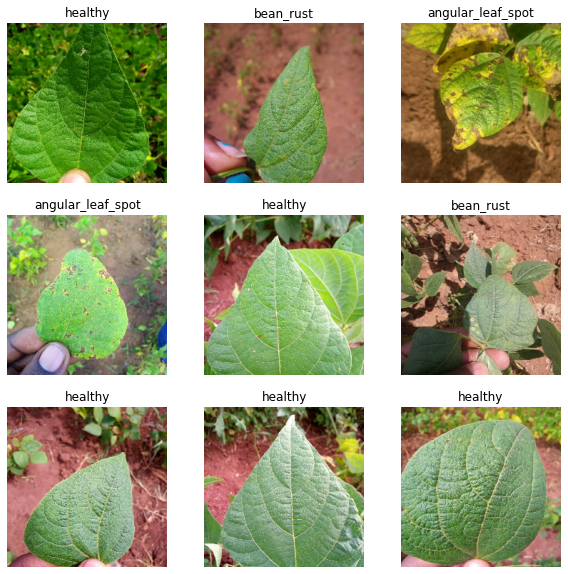

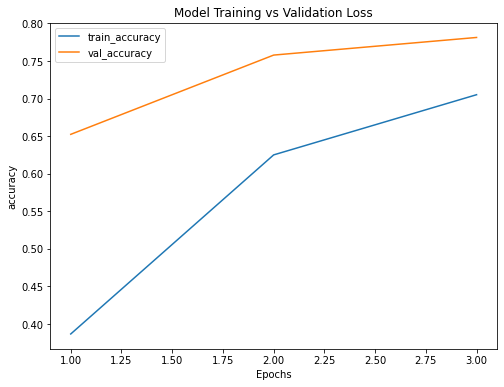

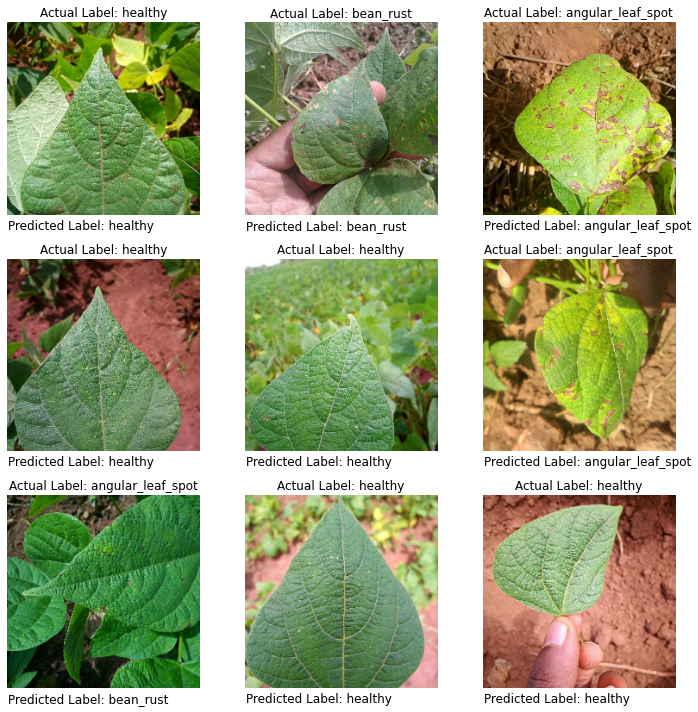

In [6]:
model, dicti = deepauto.fit("", target, keras_model_type=keras_model_type, 
                            project_name='beans',
                 save_model_flag=False, model_options=model_options,model_use_case='',
                            keras_options=keras_options, use_my_model='', verbose=0)

In [7]:
test_image_dir = datapath + 'beans/test'
predictions = deepauto.predict_images(test_image_dir, model, dicti)


Using <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000258EC6576D0> model provided as input...
Time taken to load saved model = 0 seconds
    loading and predicting on folder: ../Ram/Data_Sets/beans/test
Found 128 files belonging to 3 classes.
    Sample predictions before inverse_transform: [2 2 0 1 2]
    Sample predictions after inverse_transform: ['healthy' 'healthy' 'angular_leaf_spot' 'bean_rust' 'healthy']


In [9]:
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
#print(classification_report(test[target].values,predictions[1]))
#print(np.sqrt(mean_squared_error(test[target].values,predictions[0])))